# Student Performance Predection

In [4]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("SPF.csv")
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


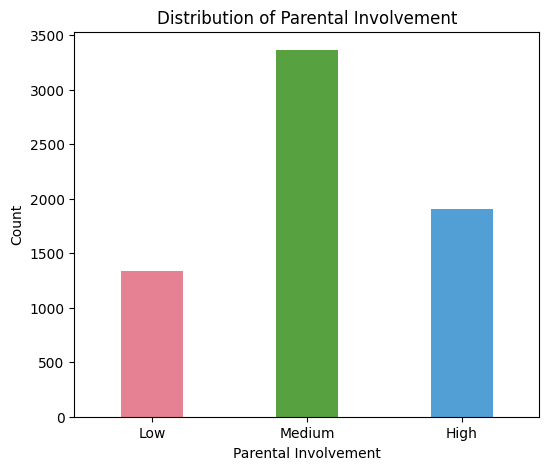

In [6]:
plt.figure(figsize=(6,5))

sns.countplot(data=df, x="Parental_Involvement", palette = 'husl', width=0.4)
# plt.xticks(rotation=45, ha='right')
plt.xlabel("Parental Involvement")
plt.ylabel("Count")
plt.title("Distribution of Parental Involvement")
plt.show()

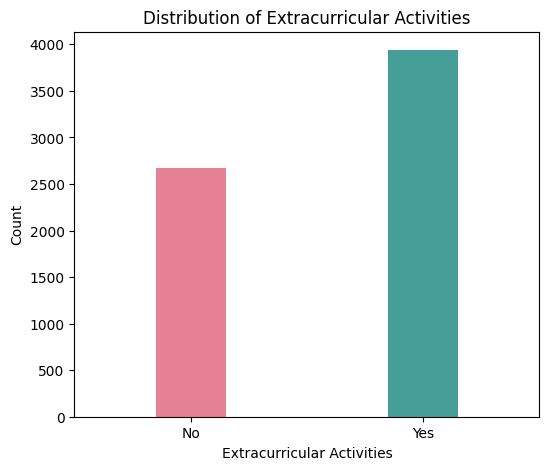

In [7]:
plt.figure(figsize=(6,5))

sns.countplot(data=df, x="Extracurricular_Activities", palette = 'husl', width=0.3)
# plt.xticks(rotation=45, ha='right')
plt.xlabel("Extracurricular Activities")
plt.ylabel("Count")
plt.title("Distribution of Extracurricular Activities")
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

## Checking for missing values

In [9]:
missing = df.isnull().sum()
print(missing[missing > 0])

Teacher_Quality             78
Parental_Education_Level    90
Distance_from_Home          67
dtype: int64


## Handle Missing Values
Since `Teacher_Quality`, `Parental_Education_Level`, and `Distance_from_Home` have missing values, let’s fill them with the mode.

In [10]:
for col in ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']:
    df[col].fillna(df[col].mode()[0], inplace=True)

## Checking for duplicate
check if there any dublicated records in the data

In [11]:
df.duplicated().sum()

0

## Describe the Statistics for Numeric Columns

This section focuses on summarizing the statistics related to the numeric columns in the dataset.

In [12]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


## Encode Categorical Variables
Identify categorical columns, then turn them into numerical values.

In [13]:
# Encoding The Categorical Data

Featuers1 = ['Parental_Involvement' ,'Family_Income', 'Access_to_Resources', 'Motivation_Level' ,'Teacher_Quality']
for feature in Featuers1:
  df[feature] = df[feature].apply(lambda x: 0 if x == 'Low' else (1 if x == 'Medium' else 2))

Featuers2 = ['Extracurricular_Activities' ,'Internet_Access', 'Learning_Disabilities']
for feature in Featuers2:
  df[feature] = df[feature].apply(lambda x: 0 if x == 'No' else 1)

df['School_Type'] = df['School_Type'].map({
    'Private': 0,
    'Public': 1
})

df['Peer_Influence'] = df['Peer_Influence'].map({
    'Negative': 0,
    'Neutral': 1,
    'Positive': 2
})

df['Parental_Education_Level'] = df['Parental_Education_Level'].map({
    'High School': 0,
    'College': 1,
    'Postgraduate': 2
})

df['Distance_from_Home'] = df['Distance_from_Home'].map({
    'Near': 1,
    'Moderate': 2,
    'Far': 3,
})

df['Gender'] = df['Gender'].map({
    'Male': 0,
    'Female': 1
})

df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,2,0,7,73,0,1,0,0,1,1,2,3,0,0,1,0,67
1,19,64,0,1,0,8,59,0,1,2,1,1,1,0,4,0,1,2,1,61
2,24,98,1,1,1,7,91,1,1,2,1,1,1,1,4,0,2,1,0,74
3,29,89,0,1,1,8,98,1,1,1,1,1,1,0,4,0,0,2,0,71
4,19,92,1,1,1,6,65,1,1,3,1,2,1,1,4,0,1,1,1,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,2,1,0,7,76,1,1,1,2,1,1,2,2,0,0,1,1,68
6603,23,76,2,1,0,8,81,1,1,3,0,2,1,2,2,0,0,1,1,69
6604,20,90,1,0,1,6,65,0,1,3,0,1,1,0,2,0,2,1,1,68
6605,10,86,2,2,1,6,91,2,1,2,0,1,0,2,3,0,0,3,1,68
